**Title:** Fraud Detection on Credit Card records using Random Forest.   
**Author:** German Martinez-Ayuso   

**A not very formal, neither comprehensive guide to the application of the gradient boosted decision trees to the detection of fraud in finance.** 


Inspiration article: _"Credit Card Fraud Detection using Autoencoders in Keras | TensorFlow for Hackers (Part VII)"_ By Venelin Valkov. [Link](https://www.curiousily.com/posts/credit-card-fraud-detection-using-autoencoders-in-keras/)

# Introduction

Nowadays having a credit or debit card for shopping online seems like mandatory, specially during quarantine. However everybody (at least me!) feels a bit unsecured when they input their card numbers on a website. There are many risks out there, identity fraud, theft of bank details, etc. 
Fortunately many banks are catching up with fraud detection applying machine learning techniques. In this article/gist we are going to demonstrate how we can use boosted decision trees to detect fraud in credit cards records.


# Decision tree

A decision tree is decision tool whose structure resemble a tree. Each of the nodes of this structure represents a "test" (or evaluation of an activation function). Using the results of these test, the classification rules are obtained which goes from the root (input) to the leaves (outputs). 

One example of decision tree is the Galton machine:

|![Galton machine](galton_machine.gif)| 
|:------:|
|   [Galton machine](https://en.wikipedia.org/wiki/File:Galton_box.webm) |
|From [Wikipedia-Beam machine](https://en.wikipedia.org/wiki/Bean_machine)  |

Each of the pegs is a test where the ball will be driven to one of the sides. Since all the pegs and balls are equal, the probability of the ball going to one side or another is the same. Since it is the same, the balls will tend to be closer to the center because the probability of them going to the extremes is lower. This machine generate a distribution of the balls which corresponds to the "**normal distribution**". 



| ![Galton board](https://github.com/germa89/Financial_Fraud_Detection/blob/master/galton_board.png) | 
|:------:|
|   Galton representation  |
| Copyright : Peter Hermes Furian. [123RF.com](https://www.123rf.com/photo_79407706_stock-vector-the-mathematics-of-the-galton-board-with-normal-distribution-and-gaussian-bell-curve-also-quincunx-b.html) |

The decision trees present several advantages. The main one is that they are easy to understand and interpret hence these models are widely applied in order to obtain a good understanding of the underlying model.


## Decision Tree Structure
The decision trees are composed of:
- Nodes. Where the branches growth from. Here is where the tests are applied.
- Branches. They represents the links between nodes.
- Leaves. They are the final output at the end of the branches. They might not be applied any tests. 



# Gradient Boosted Decision Trees


The XGBoost is the solution for the optimization of assemblies of decision trees. It is based on the concept that decision trees can be considered as a function which can be optimized using gradient techniques as any common function. 
This optimization would be "measured" using a loss function. 
This function is a measure of the error in the predicted values compared with the real values in the training set.

The algorithm uses the next inputs:

- Training set: $\{(x_i, y_i)\}^n_{i=1}$ 
- Differentiable loss function: $L(y,F(x))$ 
- Maximum number of iterations: $M$

and follows the next steps (From Wikipedia):

1. Initialize the model with random values.

$$F_0(x) = \arg \min \sum^n_{i=1} L(y_i, \gamma)$$

2. For m=1 to M:  

    2.1. Compute so-called pseudo-residuals:
    $$ r_{im} = - \left[ \dfrac{\partial L(y_i,F(x_i))}{\partial F(x_i)} \right]_{F(x) = F_{m-1}(x)} \hspace{3ex} \text{for i = 1,  ..., n}$$   
    
    2.2. Fit a base learner (or weak learner e.g. tree) $h_m(x)$ to pseudo-residuals, i.e. train it using the training set.     
    
    2.3. Compute multiplier $\gamma_m$ by solving the one-dimensional optimization problem:
    $$ \gamma_m = \arg \min \sum^n_{i=1} L(y_i, F_{m-1}(x_i) + \gamma h_m(x_i))$$   
    
    2.4. Update the model:
    $$ F_m(x) = F_{m-1}(x) + \gamma_m h_m(x)$$

3. Output $F_M(x)$.

This is as it is explained in Wikipedia. However in a more simplistic way, this procedure could be explained as:

1. Initialize the model with random values ($x_0$).
2. Start iterations until maximum number of iterations is reached. 

    2.1. Calculate the increments in the loss function for the values ($x_m$).  
    2.2. Train the decision trees ($h_m(x)$) to fit the increments.  
    2.3. Obtain $\gamma$ from the optimization problem given the trained trees.  
    2.4. Update the model ($F_m(x)$).   
    
It should be noticed that the decision trees are trained on the residual, hence their results $h_m(x)$ are added to the solution in the previous iteration $F_{m-1}(x)$ multiplied by $\gamma_m$. 


## Avoiding overfitting.

Overfitting is the what happens when the model tends to replicate very accurate the training set but it does not perform well on new data. 
This is considered as a reduction in the generality of the model and it is addressed by using regularization techniques:

### Shrinkage
This consists in adding another multiplier to the $\gamma_m$ coefficient:  

$$ F_m(x) = F_{m-1}(x) + \nu \gamma_m h_m(x)  \hspace{3ex} 0 < \nu \leq 1$$   

where $\nu$ is called "learning rate". 

This improves substantially the performance the model. Empirically it is demonstrated that values of $\nu$ lower than 0.1 are the best. 


### Stochastic gradient boosting

Stochastic gradient boosting take the idea from the bootstrap aggregation ("bagging") method. 
The idea consists on train each of the trees ($h_m(x)$) in a subset of the training set randomly generated without replacement.
It has been observed that this improve substantially the model accuracy. 
The subsample size is represented as a fraction $f$ of the total set. If $f=1$ this improvement is not applied. Practically it has been observed that for moderate or small size dataset, the optimal $f$ values are between 0.5 and 0.8.
Since the subsets are smaller, there is generally an improvement in the training speed. 

This approach might leave out some observations when building the learners (trees). These observation can be used as a validation inside the scheme hence it is not needed a validation set. The error between these leave-out observations and the model predictions is called "out-of-bag error. 


### Number of observation in leaves.
Ensuring that there is, at least, a minimum number of observations in each of the leaves of the trees is another way to help to regularize the model. 


### Penalize tree complexity
The complexity of the tree is measured as the number of leaves. Using a suitable pruning approach it might help to reduce the number of leaves by removing leaves or branches that do not contribute to reduce the loss by a threshold. 


--  
**REFERENCES:**   

1. [Wikipedia-Decision Tree](https://en.wikipedia.org/wiki/Decision_tree)   
2. [Wikipedia-Gradient Boosting](https://en.wikipedia.org/wiki/Gradient_boosting)   
3. [Wikipedia-Receiver operating characteristics](https://en.wikipedia.org/wiki/Receiver_operating_characteristic)   

# Application of XGBoost to Finance Fraud detection

## Dataset: Credit card transfers.

Importing libraries

In [1]:
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Reading the data 

In [2]:
df = pd.read_csv("creditcard.csv")

print(df.columns)
df.head()

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


The variables are not defined, then we are going to use a black-input approach. We won't do an exploratory analysis. 

Since decision trees do not required normalization of the data [1](https://datascience.stackexchange.com/questions/60950/is-it-necessary-to-normalise-data-for-xgboost), the XGBoost does not required either. 


## Model application

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
# Splitting the dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                                    df.drop('Class',axis=1),
                                    df['Class'],
                                    test_size=0.3,
                                    train_size=0.7,
                                    random_state=1)

In [5]:
from sklearn.metrics import roc_auc_score as measure_roc_auc
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

We will use a random search algorithm which will find the optimal values for the model parameters. 
Other option is to use a grid search, however this grid search is frequently more time-consuming than the random search. 

In [6]:
xgb = XGBClassifier(max_bin=16)

# Space search for the parameters.
prams={
    'learning_rate':[0.01,0.033,0.063,0.1], #Step size shrinkage used to prevent overfitting. Range is [0,1]
    'n_estimators':[100,200,500],        #Number of trees you want to build.
    'max_depth':[3,5],                          #The maximum depth of a tree
    'colsample_bytree':[0.1,0.3,0.5],            #Denotes the fraction of columns to be randomly samples for each tree.
    'subsample':[0.1,0.3,0.5]                    #Denotes the fraction of observations to be randomly samples for each tree.
}

# prams={
#     'learning_rate':[0.05], #Step size shrinkage used to prevent overfitting. Range is [0,1]
#     'n_estimators':[100],        #Number of trees you want to build.
#     'max_depth':[3],                          #The maximum depth of a tree
#     'colsample_bytree':[0.1],            #Denotes the fraction of columns to be randomly samples for each tree.
#     'subsample':[0.1]                    #Denotes the fraction of observations to be randomly samples for each tree.
# }


#RandomizedSearchCV search for the optimal set of hyperparameters
opt_xgb=RandomizedSearchCV(xgb,
                              param_distributions=prams,
                              verbose=2,
                              n_iter=20,
                              cv=10,
                              scoring='roc_auc',
                              n_jobs=2 # To speed up calculations
                             );

opt_xgb.fit(X_train, y_train) #Training

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed: 31.7min
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed: 155.5min
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed: 195.1min finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=16,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constr...
                                           validate_parameters=False,
                                           verbosity=None),
                   iid='deprecated', n_iter=20, n_jobs=2,
                   param_distributi

Let's save the model for later sessions.

In [7]:
# Saving
%store opt_xgb df 
pickle.dump(opt_xgb, open("model.dat", "wb"))

#load 
# %store -r opt_xgb df 
# loaded_model = pickle.load(open("model.dat", "rb"))

Stored 'opt_xgb' (RandomizedSearchCV)
Stored 'df' (DataFrame)


Printing model best parameters.

In [8]:
pprint(opt_xgb.best_params_)
print("\nThe AUC score is {}".format(opt_xgb.best_score_))

{'colsample_bytree': 0.1,
 'learning_rate': 0.033,
 'max_depth': 3,
 'n_estimators': 500,
 'subsample': 0.3}

The AUC score is 0.9814628856726895


Predicting on the test values. 

In [9]:
predict_y = opt_xgb.predict_proba(X_test)
accur_training = measure_roc_auc(y_test, predict_y[:, 1])

print("The test AUC for training data is: {:0.6f}".format(accur_training))

The test AUC for training data is: 0.982795


The AUC score is 0.962289 on the test samples. The AUC score is the area under the curve ROC which is the relation between the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. 
The higher the values of the true positive, the better performs the algorithm. 

The area under the curve ROC (AUC-ROC) is used as a metric for many algorithms. Other metrics can be the F-1 score, the mean-squared-error (MSE), etc. 


| ![Example of ROC curve-From wikipedia](https://upload.wikimedia.org/wikipedia/commons/6/6b/Roccurves.png)| 
|:------:|
|   ROC Curve  |
|[ROC Curve-From Wikipedia](https://upload.wikimedia.org/wikipedia/commons/6/6b/Roccurves.png) |


Let's plot our own ROC curve:


In [10]:
from sklearn.metrics import roc_curve, auc 

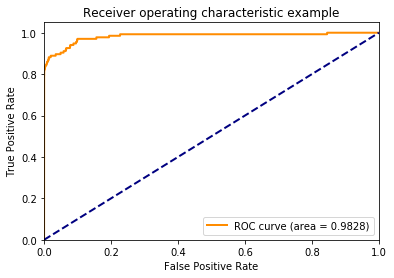

In [11]:
# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, predict_y[:, 1],
                        drop_intermediate = True)

roc_auc = auc(fpr, tpr)

# Plot of a ROC curve for a specific class
plt.figure()
lw = 2

plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Finally let's plot the importance of the features extracted from the model.

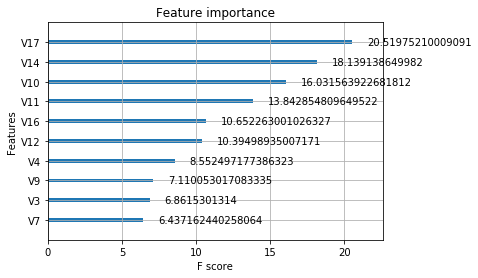

In [12]:
from xgboost import plot_importance
from xgboost import plot_tree

model = opt_xgb.best_estimator_
 
plot_importance(model, importance_type='gain', max_num_features=10); 

# Conclusion

Machine learning algorithms such as XGBoost based on decision trees can be used to detect fraud in finance with a high accuracy (more than 95%). 
